# PRiAD 6 - test zaliczający

Test obejmuje materiał z ćwiczenia PRiAD6, wymaga także znajmości zagadnień z wcześniejszych ćwiczeń (w szczególności z uczenia nienadzorowanego). 

---
**Imię, nazwisko i numer indeksu:** Kamil Sztandur 307354

---

In [1]:
# Import potrzebnych bibliotek

import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as pat
from skimage import io
import skimage as si
import skimage.filters as sif
import skimage.segmentation as sis
import skimage.measure as sime
import skimage.morphology as simo
import skimage.color as sic
import sklearn.preprocessing.StandardScaler as spss

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

# zmiana sposobu wyświetlania danych zmiennoprzecinkowych
pd.options.display.float_format = "{:.2f}".format 

ModuleNotFoundError: No module named 'sklearn.preprocessing.StandardScaler'

> **Zadanie 1** Wczytaj obraz `PRiAD6.tif`. Obraz zawiera owalne obiekty trzech rodzajów - małe oraz większe o dwóch orientacjach. Dokonaj jego binaryzacji (poprzedzonej lub porzedzającej jeśli to konieczne) filtrację tak by otrzymać obraz zawierający jedynie białe owalne obiekty trzech rodzajów na jednolitym czarnym tle. 

(-0.5, 1999.5, 1999.5, -0.5)

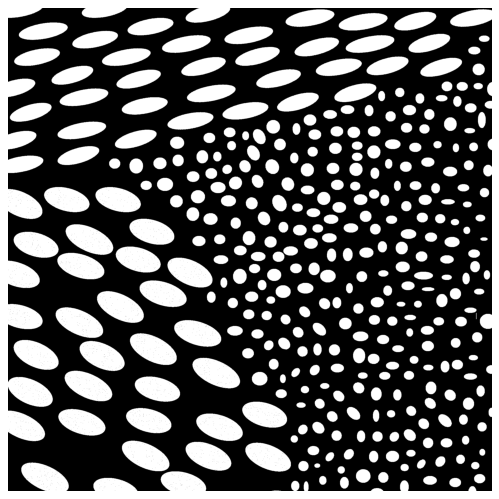

In [5]:
# Wczytanie obrazu
filename = 'PRiAD6.tif'
image = io.imread(filename, 0)

# Binaryzacja
binary = (image > 68)

# Filtracja morfologiczna filtrem otwarcia
filteredImage = simo.opening(binary, simo.square(1))

# Narysowanie obrazu
imageSize = 8
plt.figure(figsize = (imageSize, imageSize), dpi = 80)
plt.imshow(filteredImage, cmap = plt.cm.gray)
plt.axis("off") 

> **Zadanie 2** Wykonaj etykietowanie obiektów, w efekcie którego każdy obiekt otrzyma swoją unikalną etykietę. Wyświetl w dowolny sposób obraz zawierający etykiety. Dobierz cechy umożliwiające rozróżnienie trzech rodzajów obiektów 

(-0.5, 1999.5, 1999.5, -0.5)

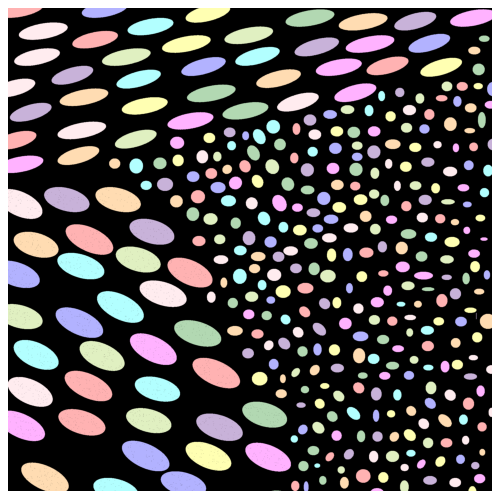

In [6]:
# Etykietowanie obiektów
labels = sime.label(filteredImage)

# Utworzenie obrazu wizualizującego etykiety
labelsVisualisation = sic.label2rgb(
    labels, 
    image = filteredImage, 
    bg_label = 0
)

# Wyświetlenie obrazu wizualizujacego etykiety
imageSize = 8
plt.figure(figsize = (imageSize, imageSize), dpi = 80)
plt.imshow(labelsVisualisation)
plt.axis("off") 

In [7]:
# Pobranie regionów owali
ovals = sime.regionprops(labels)

# Utworzenie macierzy przechowującej nasze atrybuty
importantAttributes = ['Area', 'Orientation', 'Centroid']
trueAttributes = pd.DataFrame(
    columns = importantAttributes
)

# Wydobycie atrybutów z regionów dla poszczególnych owali
for oval in ovals:
    orientation = oval.orientation
    centroid = oval.centroid
    area = oval.area

    trueAttributes = trueAttributes.append(
        {'Area' : area, 'Orientation' : orientation, 'Centroid' : centroid},
        ignore_index = True
    )

trueAttributes

,Area,Orientation,Centroid
0,4723,-1.45,"(17.981156044886724, 57.4236713952996)"
1,6338,-1.49,"(19.037077942568633, 387.0334490375513)"
2,8523,-1.38,"(29.281121670773203, 821.0150181860847)"
3,9237,-1.38,"(45.787809894987554, 1917.4737468875176)"
4,10267,-1.40,"(45.23453783968053, 1247.2576215057952)"
...,...,...,...
361,691,-0.00,"(1980.8408104196817, 1231.5311143270621)"
362,504,-1.57,"(1991.0257936507937, 1918.484126984127)"
363,459,1.57,"(1994.483660130719, 1524.6274509803923)"
364,56,1.57,"(1998.642857142857, 1108.9642857142858)"


> **Zadanie 3** Wykonaj grupowanie danych wykorzystując wybrane przed chwilą cechy, tak by w jego wyniku uzyskać podział zbioru obiektów na grupy zgodny ze stanem faktycznym tj. z trzema grupami: obiektami małymi i większymi o obu orientacjach. Na podstawie wyniku grupowania wygeneruj obraz, w którym obiekty należące do każdej grupy będą oznaczone inną szrością lub kolorem.

In [8]:
# Inicjalizacja bufora na numer klasy
ovalsAmount = trueAttributes.shape[0]
trueAttributes["Klasa"] = np.zeros(ovalsAmount).astype(np.int)
trueAttributes

,Area,Orientation,Centroid,Klasa
0,4723,-1.45,"(17.981156044886724, 57.4236713952996)",0
1,6338,-1.49,"(19.037077942568633, 387.0334490375513)",0
2,8523,-1.38,"(29.281121670773203, 821.0150181860847)",0
3,9237,-1.38,"(45.787809894987554, 1917.4737468875176)",0
4,10267,-1.40,"(45.23453783968053, 1247.2576215057952)",0
...,...,...,...,...
361,691,-0.00,"(1980.8408104196817, 1231.5311143270621)",0
362,504,-1.57,"(1991.0257936507937, 1918.484126984127)",0
363,459,1.57,"(1994.483660130719, 1524.6274509803923)",0
364,56,1.57,"(1998.642857142857, 1108.9642857142858)",0


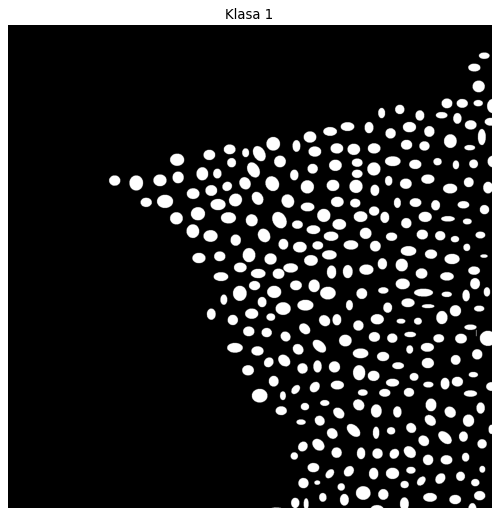

In [9]:
# Klasa 1 (najmniejsze owale) - identyfikacja
firstClassCondition = trueAttributes['Area'] <= 4700

# Wyodrębnienie obiektów
lesserThan4700 = np.where(firstClassCondition) + np.array(1)
firstClassOvalsImage = np.where(
    np.isin(labels, lesserThan4700),
    255,
    0
)

# Narysowanie tylko wyodrębionych obiektów
imageSize = 8
plt.figure(figsize = (imageSize, imageSize), dpi = 80)
plt.imshow(firstClassOvalsImage, cmap = plt.cm.gray)
plt.axis("off") 
plt.title("Klasa 1")

# Przypisanie wszystkim obiektom spełniającym ten warunek klasę 1
trueAttributes.loc[
    firstClassCondition, 
    'Klasa'
] = 1

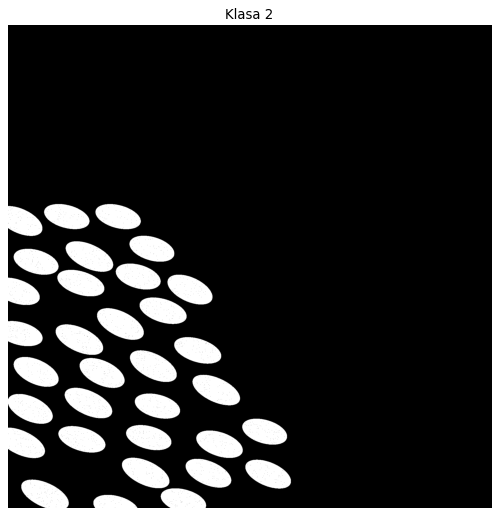

In [10]:
# Klasa 2 (najwieksze owale) - identyfikacja
secondClassCondition = (trueAttributes['Area'] > 4700) & (trueAttributes['Orientation'] > 0)

# Wyodrębnienie obiektów
biggerThan11000 = np.where(secondClassCondition) + np.array(1)
secondClassOvalsImage = np.where(
    np.isin(labels, biggerThan11000),
    255,
    0
)

# Narysowanie tylko wyodrębionych obiektów
imageSize = 8
plt.figure(figsize = (imageSize, imageSize), dpi = 80)
plt.imshow(secondClassOvalsImage, cmap = plt.cm.gray)
plt.axis("off") 
plt.title("Klasa 2")

# Przypisanie wszystkim obiektom spełniającym ten warunek klasę 2
trueAttributes.loc[
    secondClassCondition, 
    'Klasa'
] = 2

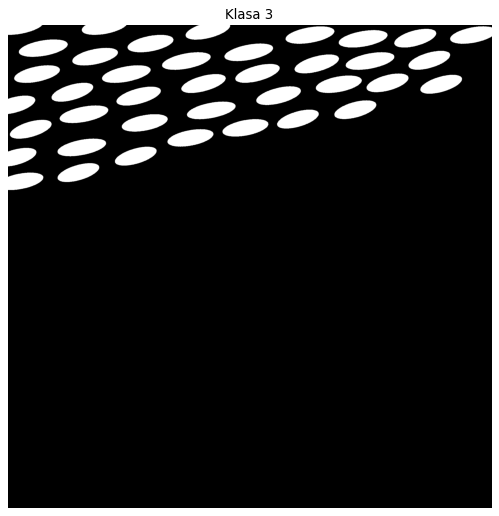

In [11]:
# Klasa 3 (górne owale) - identyfikacja
thirdClassCondition = (trueAttributes['Area'] > 4700) & (trueAttributes['Orientation'] <= 0)

between4700and11000 = np.where(thirdClassCondition) + np.array(1)
thirdClassOvalsImage = np.where(
    np.isin(labels, between4700and11000),
    255,
    0
)

imageSize = 8
plt.figure(figsize = (imageSize, imageSize), dpi = 80)
plt.imshow(thirdClassOvalsImage, cmap = plt.cm.gray)
plt.axis("off") 
plt.title("Klasa 3")

# Przypisanie wszystkim obiektom spełniającym ten warunek klasę 3
trueAttributes.loc[
    thirdClassCondition, 
    'Klasa'
] = 3

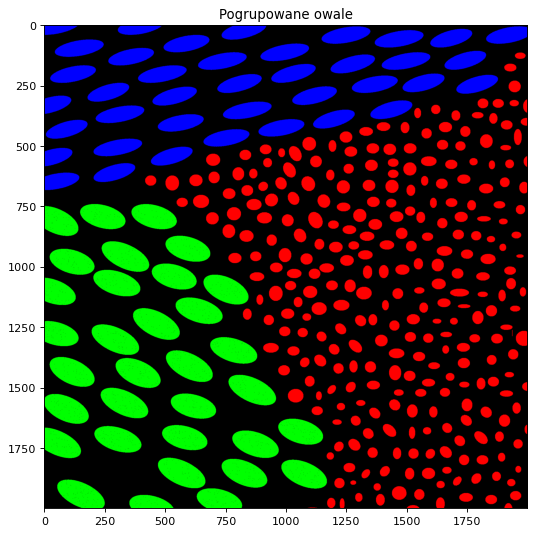

In [12]:
# Wyświetlenie pogrupowanych owali na jednym obrazku
layers = []

# Dodanie warstw z obiektami poszczególnych klas
layers.append(firstClassOvalsImage)
layers.append(secondClassOvalsImage)
layers.append(thirdClassOvalsImage)

# Utworzenie obrazu z 3 wartsw
height = int(layers[0].size / len(layers[0]))
width = len(layers[0])

groupedOvalsImageLayers = np.zeros(
    [height, width, 3], 
    dtype = np.uint8
)

groupedOvalsImageLayers[:,:,0] = layers[0]
groupedOvalsImageLayers[:,:,1] = layers[1]
groupedOvalsImageLayers[:,:,2] = layers[2]

# Narysowanie obrazu z pogrupowanymi owalami
imageSize = 8
plt.figure(figsize = (imageSize, imageSize), dpi = 80)
plt.title("Pogrupowane owale")
plt.imshow(groupedOvalsImageLayers)

> **Zadanie 4** (niepunktowane) Zmień nazwę tego skryptu na następującą "PRiAD6_Imię_Nazwisko.ipynb" i wgraj wgraj go do ISOD-a we wskazane miejsce, nie przekraczając wyznaczonego terminu.